<a href="https://colab.research.google.com/github/SanhoLee/colab_studying/blob/main/clone_classification_tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고한 웹사이트

[튜토리얼 메인페이지](https://www.tensorflow.org/tutorials/keras/classification)


[클론 코랩 파일](https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb#scrollTo=yRJ7JU7JCaXT)

In [37]:
# Import TensorFlow
import tensorflow as tf

# helper libs.
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## MNIST 데이터셋 임포트

In [38]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

## 레이블 숫자에 해당되는 클래스 이름을 변수로 정의한다.

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

## 데이터 탐색

데이터 개요를 살펴본다.

In [40]:
train_images.shape

(60000, 28, 28)

In [41]:
len(train_labels)

60000

In [42]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

레이블은 0~9 사이의 값을 가지고 있다. 위에서 클래스를 정의했고, 각 인덱스별로 클래스 이름이 매칭된다고 생각하면 된다.

In [43]:
test_images.shape

(10000, 28, 28)

테스트 데이터는 10000개 확인.

In [44]:
len(test_images)

10000

## 데이터 전처리

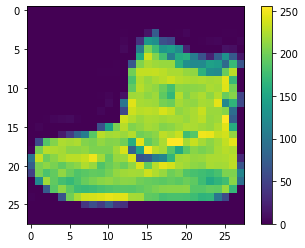

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

픽셀의 범위는 0~255 범위에서 표현되고 있다. (uint8 인듯)

신경망에 주입하기 전에 픽셀 데이터를 0~1사이의 값으로 변환해야 한다. 그래서 train, test 데이터에 대해서 255를 나눠준다.

In [46]:
train_images = train_images / 255
test_images = test_images / 255

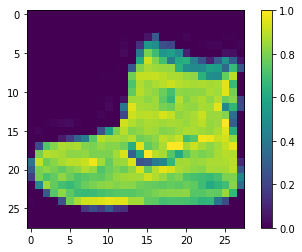

In [47]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# 아래 그림에서 0~1사이로 칼라 범위가 변경된 것을 알 수 있다.

훈련세트의 25개 이미지와 클래스 이름을 출력해본다. 데이터 포맷을 올바른지 확인하고, 네트워크 구성과 훈련할 준비를 한다.

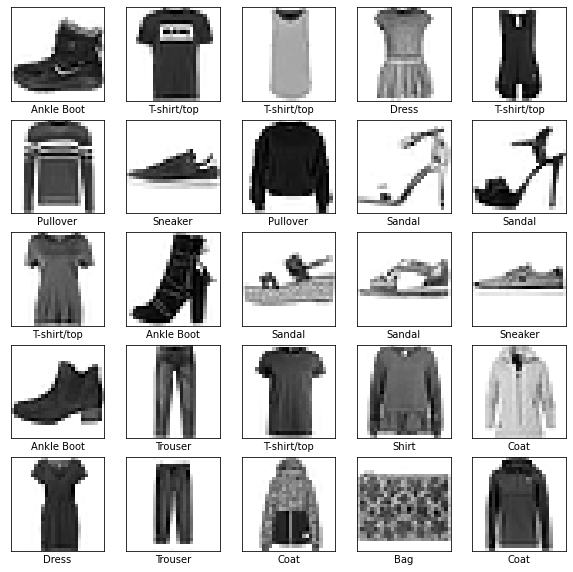

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

신경망 모델을 구성하기 위한 과정
1. 모델의 층을 구성
2. 모델을 컴파일

---

1. 모델의 층을 구성

레이어에 공급된 데이터로부터 표현을 추출한다.
대부분 딥러닝은 간단한 층을 연결하여 구성된다.
~layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [49]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

### 모델 컴파일

모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 [*컴파일*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 단계에서 추가됩니다.

- [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

모델 층을 생성하고, 모델의 훈련 프로세스 특징들을 대입해서 컴파일까지 해주었다. 그럼 컴파일된 모델을 사용해서, 모델을 훈련시킬 수 있게 된다.(?)

## 모델 훈련

신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.

### 모델 피드

훈련을 시작하려면, model.fit 메서드를 호출합니다. 모델을 훈련 데이터에 맞추기('FIT') 때문에 이렇게 불립니다.

In [51]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4956 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3743 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2458 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련세트에서 약 0.91(91%) 정도의 정확도를 달성했다.

### 정확도 평가

다음으로, 모델이 테스트 데이터 셋에서 작동하는 방식을 비교한다.
(훈련된 모델을 가지고 평가를 하게 되는 건가? 라는 생각이 든다.)

In [52]:
# 새로운 변수
# 테스트 데이터 셋의 로스와 정확도.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest Accuracy : ", test_acc)

313/313 - 0s - loss: 0.3867 - accuracy: 0.8644 - 457ms/epoch - 1ms/step

Test Accuracy :  0.8644000291824341


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 *과대적합*(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

- [과대적합 시연](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [과대적합을 방지하기 위한 전략](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 예측하기

:훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 모델의 선형 출력, [로짓](https://developers.google.com/machine-learning/glossary#logits). 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다. 

In [53]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])
# 위에서 model을 생성할때는 레이어를 평탄화, Dense작업등을 해줬는데, 여기서는 훈련된 model을 인수로 가져와서 대입했다.
# 그리고, Softmax() 레이어를 연결해서, 로짓? 을 해석한다.

위에서 만들 확률 모델? 을 이용해서 예측 결과를 확률적으로 찾아낸다.

In [54]:
# 인풋 : 테스트 이미지 세트
# predict 메서드를 이용해서 예측을 실행
predictions = probability_model.predict(test_images)

In [55]:
predictions[0]

array([7.1735235e-07, 2.6170115e-11, 1.0248322e-08, 3.7022058e-10,
       1.4427882e-08, 5.0726859e-04, 1.7903817e-07, 3.6392459e-01,
       2.1134647e-06, 6.3556510e-01], dtype=float32)

아, 이 10 개의 숫자들은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타낸다. 가장높은 신뢰도를 출력해보자.

In [56]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클부츠(class_name[9])라고 가장 확신하고 있다. 레이블 값을 출력해서 확인해본다.

In [57]:
test_labels[0]

9

9번째 인덱스를 잘 가리키고 있다.

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다.

In [58]:
# 함수 작성1 : 이미지 작성
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

In [59]:
# 함수 작성2 : 한 이미지에서 예측한 클래스별 신뢰도를 그래프로 표현
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.

0 번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

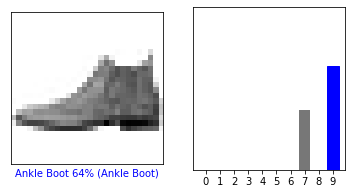

In [60]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

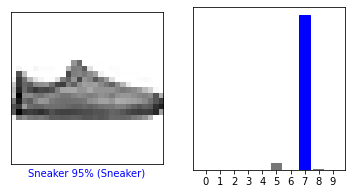

In [61]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

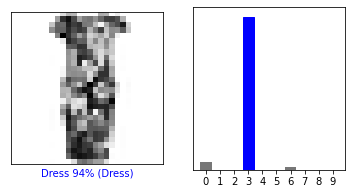

In [62]:
i=100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

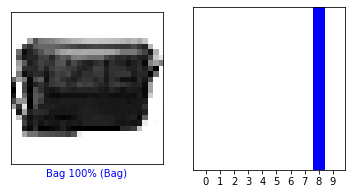

In [63]:
i=56
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

매우 흥미롭다. sandal, sneakers 는 나도 구별하기 힘들거 같다.

올바르게 예측된 레이블을 파란색이고, 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

추가로 몇개의 이미지에 대해서 예측을 출력해보자.

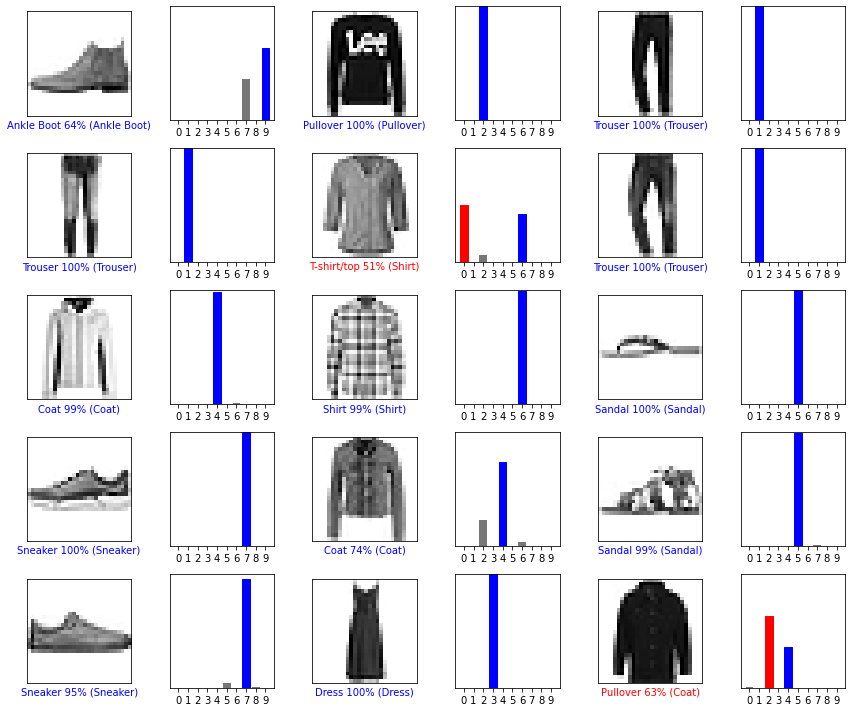

In [64]:
# 테스트 데이터 셋을 이용한다.

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [65]:
img = test_images[1]
print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다.

In [66]:
img = (np.expand_dims(img, axis=0))
print(img.shape)

(1, 28, 28)


3차원 배열이 된것이 아닌가?

어쨋든, 이 이미지의 예측을 만듭니다.

In [67]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[3.1604528e-04 2.9344110e-12 9.9947518e-01 2.8940808e-11 1.5942697e-04
  3.5858819e-10 4.9385584e-05 1.3937064e-10 5.2392243e-11 3.9766315e-12]]


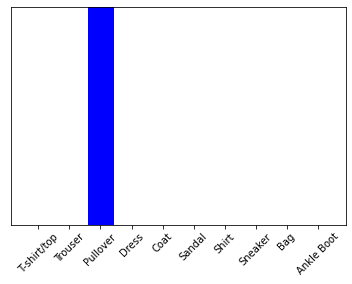

In [68]:
plot_value_array(1, predictions_single[0],test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환합니다. 배치에서 (유일한) 이미지에 대한 예측을 가져옵니다.

In [69]:
np.argmax(predictions_single[0])

2